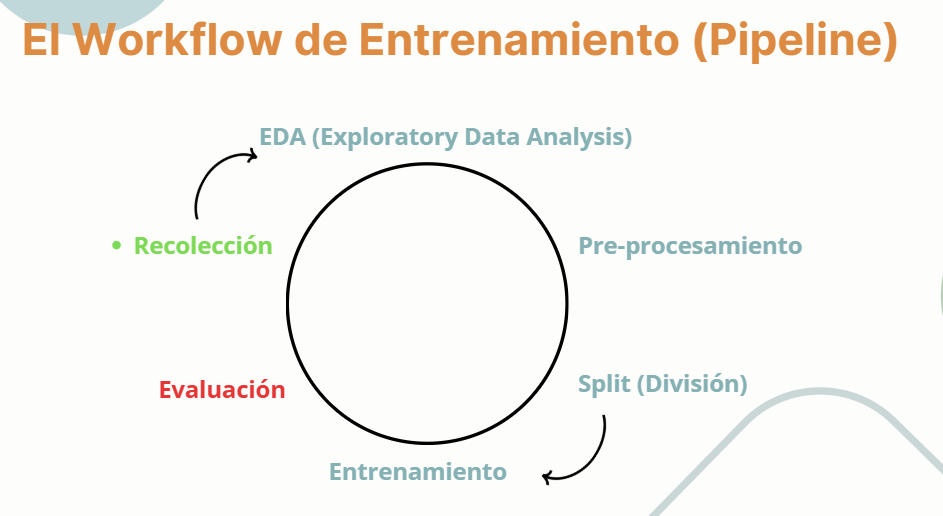

##📌 EXTRACCIÓN

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/datos_tratados (1).csv')
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


In [4]:
df.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'ChargesDaily', 'ChargesMonthly',
       'ChargesTotal'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


##🛠️ Pre procesamiento

✔️ Remover columnas irrelevantes

In [6]:
df = df.drop(columns=['CustomerID'])


In [7]:
df

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.60,593.30
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.90,280.85
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.00,1237.85
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,No,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,1.84,55.15,742.90
7039,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,No,Male,No,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.68,50.30,92.75
7041,No,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.26,67.85,4627.65


In [8]:
cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df[col] = df[col].replace({'No internet service': 'No'})


✔️ Verificación nuevamente de los valores nulos

In [9]:
df.isnull().sum()

,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 📊 EDA

✔️ Correlación entre variables numericas

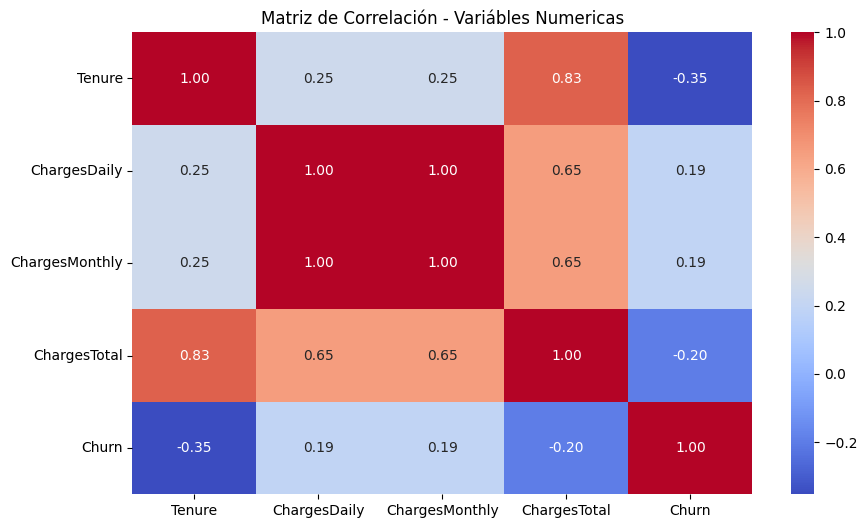

In [10]:
df_numeric = df.select_dtypes(include=["int64", "float64"])

df_numeric["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

corr_matrix = df_numeric.corr()

# Visualizar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Variábles Numericas")
plt.show()


In [11]:
df = df.drop(columns=["ChargesDaily","ChargesTotal"])

2️⃣ Analisis de churn por categoria (variables categoricas)

🔹 Seleccionar variables categoricas

In [12]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop("Churn")


🔹 Tabla de proporción por categoria

In [13]:
for col in categorical_cols:
    print(f"\n📌 Analisis de variable: {col}")
    display(pd.crosstab(df[col], df["Churn"], normalize="index") * 100)



📌 Analisis de variable: Gender


Churn,No,Yes
Gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338



📌 Analisis de variable: SeniorCitizen


Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261



📌 Analisis de variable: Partner


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903



📌 Analisis de variable: Dependents


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237



📌 Analisis de variable: PhoneService


Churn,No,Yes
PhoneService,,
No,75.073314,24.926686
Yes,73.290363,26.709637



📌 Analisis de variable: MultipleLines


Churn,No,Yes
MultipleLines,,
No,74.975442,25.024558
Yes,71.390104,28.609896



📌 Analisis de variable: InternetService


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980



📌 Analisis de variable: OnlineSecurity


Churn,No,Yes
OnlineSecurity,,
No,68.670382,31.329618
Yes,85.388806,14.611194



📌 Analisis de variable: OnlineBackup


Churn,No,Yes
OnlineBackup,,
No,70.827915,29.172085
Yes,78.468506,21.531494



📌 Analisis de variable: DeviceProtection


Churn,No,Yes
DeviceProtection,,
No,71.348193,28.651807
Yes,77.497936,22.502064



📌 Analisis de variable: TechSupport


Churn,No,Yes
TechSupport,,
No,68.813763,31.186237
Yes,84.833659,15.166341



📌 Analisis de variable: StreamingTV


Churn,No,Yes
StreamingTV,,
No,75.668819,24.331181
Yes,69.929812,30.070188



📌 Analisis de variable: StreamingMovies


Churn,No,Yes
StreamingMovies,,
No,75.620506,24.379494
Yes,70.058565,29.941435



📌 Analisis de variable: Contract


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858



📌 Analisis de variable: PaperlessBilling


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092



📌 Analisis de variable: PaymentMethod


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


🎯 Metodo recomendado: Qui-cuadrado (Chi-Square Test)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Crea copia
df_rank = df.copy()

# Convertir Churn para binario
df_rank["Churn"] = df_rank["Churn"].map({"Yes": 1, "No": 0})

# Separar variables categóricas
categorical_cols = df_rank.select_dtypes(include=["object"]).columns

# Aplicar Label Encoding temporario
le = LabelEncoder()
for col in categorical_cols:
    df_rank[col] = le.fit_transform(df_rank[col])

# Separar X e y
X_cat = df_rank[categorical_cols]
y = df_rank["Churn"]

# Aplicar teste Qui-cuadrado
chi_scores, p_values = chi2(X_cat, y)

# Criar DataFrame com ranking
chi_df = pd.DataFrame({
    "Variable": categorical_cols,
    "Chi2 Score": chi_scores,
    "p-value": p_values
})

# Ordenar por importancia
chi_df = chi_df.sort_values(by="Chi2 Score", ascending=False)

chi_df


,Variable,Chi2 Score,p-value
13,Contract,1115.780167,1.227941e-244
7,OnlineSecurity,147.295858,6.761696e-34
10,TechSupport,135.559783,2.490549e-31
1,SeniorCitizen,134.351545,4.576959e-31
3,Dependents,133.036443,8.876729e-31
14,PaperlessBilling,105.680863,8.661987e-25
2,Partner,82.412083,1.104764e-19
15,PaymentMethod,58.492250,2.040933e-14
8,OnlineBackup,31.217694,2.306541e-08
9,DeviceProtection,20.226662,6.878750e-06


In [15]:
significant_vars = chi_df[chi_df["p-value"] < 0.05]

print("\n✅ Variables significativas (p < 0.05):")
display(significant_vars)



✅ Variables significativas (p < 0.05):


,Variable,Chi2 Score,p-value
13,Contract,1115.780167,1.227941e-244
7,OnlineSecurity,147.295858,6.761696e-34
10,TechSupport,135.559783,2.490549e-31
1,SeniorCitizen,134.351545,4.576959e-31
3,Dependents,133.036443,8.876729e-31
14,PaperlessBilling,105.680863,8.661987e-25
2,Partner,82.412083,1.104764e-19
15,PaymentMethod,58.492250,2.040933e-14
8,OnlineBackup,31.217694,2.306541e-08
9,DeviceProtection,20.226662,6.878750e-06


In [16]:
df = df.drop(columns=["Gender", "PhoneService"])

## 🎯 Split

In [17]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


2.Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


3.One-Hot Encoding

In [19]:
# Aplicar One-Hot Encoding en treno
X_train = pd.get_dummies(X_train, drop_first=True)

# Aplicar en teste
X_test = pd.get_dummies(X_test, drop_first=True)

# Garantir que treno y teste tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [20]:
X_train.head()

,Tenure,ChargesMonthly,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3793,60,94.10,False,True,False,True,True,False,True,True,False,False,False,True,False,False,True,True,False,False
3192,12,19.35,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4922,2,80.45,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False
3926,33,74.75,False,True,True,False,False,False,True,False,True,False,True,True,True,False,False,True,False,False
3859,14,86.00,False,False,True,True,True,False,True,False,False,True,False,False,False,False,True,False,False,True


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3793 to 5679
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 5634 non-null   int64  
 1   ChargesMonthly                         5634 non-null   float64
 2   SeniorCitizen_Yes                      5634 non-null   bool   
 3   Partner_Yes                            5634 non-null   bool   
 4   Dependents_Yes                         5634 non-null   bool   
 5   MultipleLines_Yes                      5634 non-null   bool   
 6   InternetService_Fiber optic            5634 non-null   bool   
 7   InternetService_No                     5634 non-null   bool   
 8   OnlineSecurity_Yes                     5634 non-null   bool   
 9   OnlineBackup_Yes                       5634 non-null   bool   
 10  DeviceProtection_Yes                   5634 non-null   bool   
 11  TechSu

4. Verificar desbalanceamiento

In [23]:
y_train.value_counts(normalize=True) * 100

,proportion
Churn,
No,73.464679
Yes,26.535321


##Entrenamiento

Modelo 1 — Regresion logistica

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log_normal = log_model.predict(X_test)

print("Regresion logistica")
print(classification_report(y_test, y_pred_log_normal))

Regresion logistica
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Modelo 2 — Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1035
         Yes       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [26]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

          No       0.90      0.73      0.81      1035
         Yes       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



##Evaluación

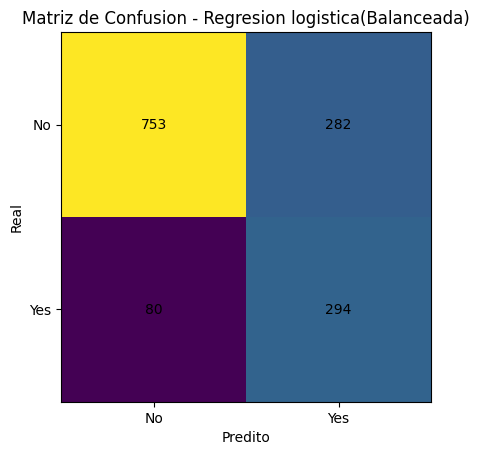

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(y_test, y_pred_log)

# Plot
plt.figure()
plt.imshow(cm)
plt.title("Matriz de Confusion - Regresion logistica(Balanceada)")
plt.xlabel("Predito")
plt.ylabel("Real")


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks([0,1], ["No", "Yes"])
plt.yticks([0,1], ["No", "Yes"])

plt.show()

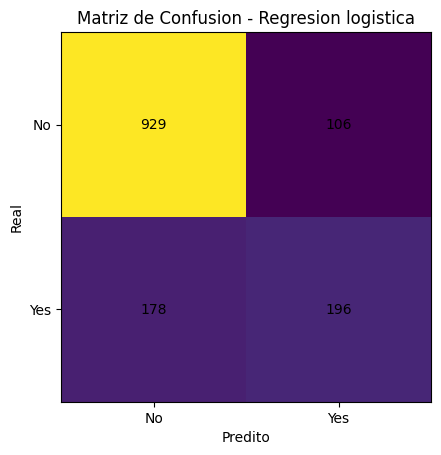

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(y_test, y_pred_log_normal)

# Plot
plt.figure()
plt.imshow(cm)
plt.title("Matriz de Confusion - Regresion logistica")
plt.xlabel("Predito")
plt.ylabel("Real")


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks([0,1], ["No", "Yes"])
plt.yticks([0,1], ["No", "Yes"])

plt.show()